This notebook tries to analyse the relationship of a car's physical size, and characteristics with its symboling value.

In [16]:
import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from CSV file
#cars=pd.read_csv("./cardata_cleaned.csv")
cars=pd.read_csv("./Automobile_data.txt")

In [17]:
cars['volume']=cars['height']*cars['length']*cars['width']

## Create two broad categories - Risky and Safe 
Label all records based on symboling value. 
-3 to 0 denotes a safe vehicle
1 - 3 denotes a risky vehicle

In [18]:
def categ_risk(x):
    if (x > 0):
        return 'risky'
    return 'safe'

def categ_risk_binary(x):
    if (x > 0):
        return 1
    return 0
    
cars['isrisky'] = cars['symboling'].apply(lambda x: categ_risk(x))
cars['isrisky10'] = cars['symboling'].apply(lambda x: categ_risk_binary(x))
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume,isrisky,isrisky10
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495,528019.904,risky,1
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500,528019.904,risky,1
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500,587592.640,risky,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,634816.956,risky,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,636734.832,risky,1


### Symboling Distribution across the dataset

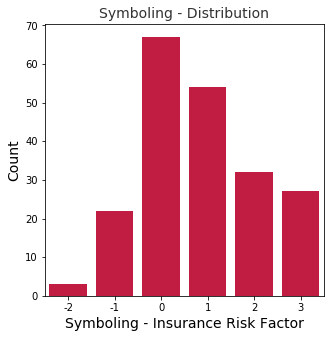

In [25]:
title_color = "#333333"
plot_color = "#dd0033"
y_title_margin = 1.0
palette = ["#FF0000","#ff8800"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

fig.patch.set_alpha(0.5)
ax.set_title("Symboling - Distribution", y = y_title_margin, color=title_color,fontsize=14)
ax.patch.set_alpha(0)

symbol_hist=sns.countplot(cars["symboling"], color=plot_color, ax=ax )
symbol_hist.set_ylabel('Count',fontsize=14 )
symbol_hist.set_xlabel('Symboling - Insurance Risk Factor',fontsize=14)
#symbol_hist.set_xlim(left=-3,right=3)

fig.savefig('./graphs/symboling_dist.png',dpi=fig.dpi,bbox_inches='tight')

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


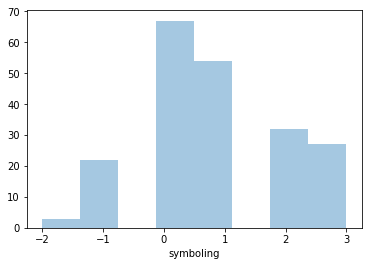

In [36]:
sns.distplot(cars['symboling'],kde=False)

### Distribution of Risky and Safe ehicles across body styles

[Text(0,0,'convertible'),
 Text(0,0,'hatchback'),
 Text(0,0,'sedan'),
 Text(0,0,'wagon'),
 Text(0,0,'hardtop')]

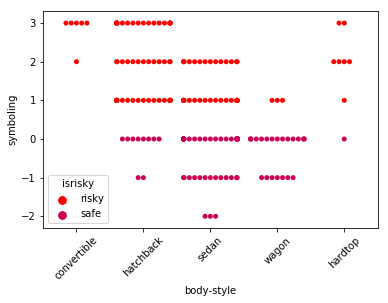

In [31]:
palette = ["#FF0000","#cc0055"]
sw1=sns.swarmplot(x="body-style",y="symboling",data=cars, hue="isrisky", palette=palette)
sw1.set_xticklabels(sw1.get_xticklabels(), rotation=45)

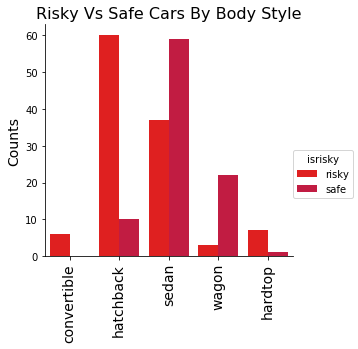

In [28]:
palette = ["#FF0000", "#dd0033"]
facet1=sns.factorplot(x="body-style",palette=palette,hue="isrisky",kind="count",data=cars)

facet1.facet_axis(0,0).set_title("Risky Vs Safe Cars By Body Style", fontsize=16)
facet1.facet_axis(0,0).set_ylabel("Counts", fontsize=14)
facet1.facet_axis(0,0).set_xlabel("")
facet1.facet_axis(0,0).patch.set_alpha(0)
facet1.facet_axis(0,0).set_xticklabels(facet1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
facet1.fig.patch.set_alpha(0.5)
#plt.show()
facet1.fig.savefig('./graphs/riskysafecounts_bodystyle.png',dpi=facet1.fig.dpi,bbox_inches='tight')


There is a clear distinction in terms of insurance risk across body styles. Sedans and wagons are marked more safe compared to conertibles and hardtops. Hatchbacks on the other hand are a mix of eerything.

### Analyze Central tendencies of Symboling

In [33]:
riskgrp = cars.groupby('isrisky')
riskgrpcnt = riskgrp.size().reset_index()
riskgrpcnt.columns=['RiskCategory','VehicleCount']
#riskgrpcnt
riskgrpmode = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
riskgrpmode.columns=['RiskCategory','SymbolingMode']
#riskgrpmode
riskgrpmodecnt = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
riskgrpmodecnt.columns=['RiskCategory','ModeCount']
#riskgrpmodecnt
riskgrpmedian = cars.groupby('isrisky')['symboling'].median().reset_index()
riskgrpmedian.columns=['RiskCategory','SymbolingMedian']
#riskgrpmedian

riskmodejoin = riskgrpcnt.merge(riskgrpmedian, how="inner", left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])
riskmodejoin = riskmodejoin.merge(riskgrpmode, how='inner',left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])
riskmodejoin = riskmodejoin.merge(riskgrpmodecnt, how="inner", left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])

riskmodejoin

,RiskCategory,VehicleCount,SymbolingMedian,SymbolingMode,ModeCount
0,risky,113,2,1,54
1,safe,92,0,0,67


Safe vehicles have their risk symbol clearly below 0, while risky vehicles are marked upwards of 0. 

In [34]:
riskgrpcnt = cars.groupby('isrisky').size().reset_index()
riskgrpcnt['Legend'] = 'VehicleCount'
riskgrpcnt.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpcnt)

riskgrpmode = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
riskgrpmode['Legend'] = 'Mode'
riskgrpmode.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpmode)

riskgrpmodecnt = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
riskgrpmodecnt['Legend'] = 'ModeCount'
riskgrpmodecnt.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpmodecnt)
#riskgrpmodecnt
riskgrpmedian = cars.groupby('isrisky')['symboling'].median().reset_index()
riskgrpmedian['Legend'] = 'Median'
riskgrpmedian.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpmedian)

riskcentraltend = riskgrpmedian.append(riskgrpmode, ignore_index=False, verify_integrity=False, sort=False)
riskcounts = riskgrpcnt.append(riskgrpmodecnt, ignore_index=False, verify_integrity=False, sort=False)

#print(riskcentraltend )
print(riskcounts)

  RiskCategory  Value        Legend
0        risky    113  VehicleCount
1         safe     92  VehicleCount
0        risky     54     ModeCount
1         safe     67     ModeCount


<Figure size 432x288 with 0 Axes>

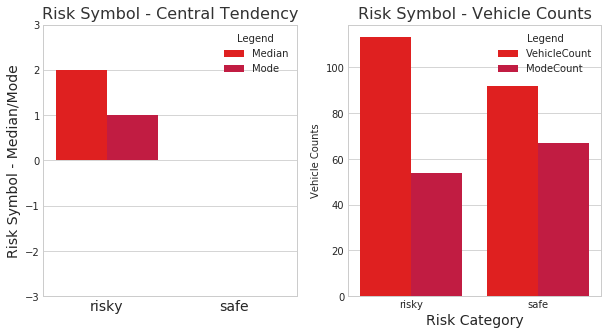

In [40]:
#palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093", "#FF4500", "#F08080"]
#palette = ["#FF0000","#FF4500","#DB7093", "#dd0033","#800000",  "#F08080"]
palette = ["#FF0000", "#dd0033"]
plot_color = "#dd0033"
title_color = "#333333"
left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.2    # the bottom of the subplots of the figure
top    =  0.3    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.1 # the amount of height reserved for white space between subplots
y_title_margin = 1.0 # The amount of space above titles
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.set_style("whitegrid") #set seaborn style template
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)

ax[0].set_title('Risk Symbol - Central Tendency',y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)
ax[0].set_ylim(-3,3)
medplot=sns.barplot( x="RiskCategory",y="Value", data=riskcentraltend, palette=palette, hue='Legend',ax=ax[0])
medplot.set_ylabel("Risk Symbol - Median/Mode", fontsize=14)
medplot.set_xlabel("", fontsize=14)
medplot.set_xticklabels(medplot.get_xticklabels(), rotation=0, fontsize=14)

ax[1].set_title('Risk Symbol - Vehicle Counts',y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)    

bar2 = sns.barplot( x="RiskCategory",y="Value", data=riskcounts, palette=palette, hue='Legend', ax=ax[1])
bar2.set_ylabel('Vehicle Counts')
bar2.set_xlabel('Risk Category', fontsize=14)

fig.savefig('./graphs/riskysafe_medianmode.png',dpi=fig.dpi,bbox_inches='tight')

In [124]:
bsriskmedian = cars.groupby(['body-style','isrisky'])['symboling'].median().reset_index()
bsriskmedian['Legend'] = 'Median'
bsriskmedian.columns =  ['body-style','isrisky','Value', 'Legend']
#print(bsriskmedian)

bsriskmode = cars.groupby(['body-style','isrisky'])['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
bsriskmode['Legend'] = 'Mode'
bsriskmode.columns = ['body-style','isrisky','Value', 'Legend']
#print(bsriskmode)

bsriskcount = cars.groupby(['body-style','isrisky'])['symboling'].count().reset_index()
bsriskcount['Legend'] = 'Vehicle Count'
bsriskcount.columns=['body-style','isrisky','Value', 'Legend']
#print(bsriskcount)

bsriskmodecount = cars.groupby(['body-style','isrisky'])['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
bsriskmodecount['Legend'] = 'Mode Count'
bsriskmodecount.columns=['body-style','isrisky','Value', 'Legend']
#print(bsriskmodecount)

bsriskcentraltend = bsriskmedian.append(bsriskmode, ignore_index=False, verify_integrity=False, sort=False)
bsriskcounts = bsriskcount.append(bsriskmodecount,ignore_index=False, verify_integrity=False, sort=False)

#print(bsriskcentraltend)
#print(bsriskcounts)

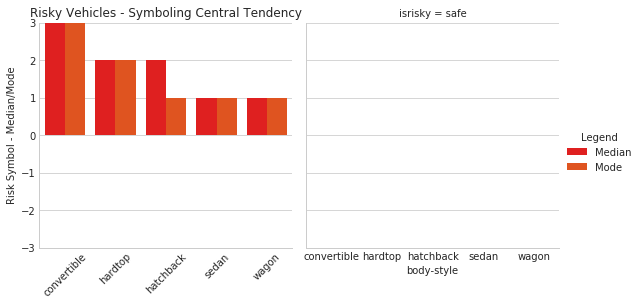

In [135]:

facet1=sns.factorplot(x="body-style",y="Value", hue="Legend", col="isrisky", data =bsriskcentraltend, kind="bar", palette=palette)
facet1.facet_axis(0,0).set_title("Risky Vehicles - Symboling Central Tendency")
facet1.facet_axis(0,0).set_ylim(-3,3)
facet1.facet_axis(0,0).set_ylabel("Risk Symbol - Median/Mode")
facet1.facet_axis(0,0).set_xlabel("")
facet1.facet_axis(0,0).patch.set_alpha(0)
facet1.facet_axis(0,0).set_xticklabels(facet1.facet_axis(0,0).get_xticklabels(), rotation=45)
facet1.fig.patch.set_alpha(0.5)


Note: Median and Mode of Symbol alues are all 0 for safe category ehicles. That's why the graph on the right is blank.

conertibles and hardtops are clearly above 0 leVel(means riskier).
Een within risky category, Sedans and wagons have lower risk symbols. 
Hatchbacks have got more positie risk ratings than negatie ones, so it's a mix of risky and safe cars. 

[Text(0,0,'convertible'),
 Text(1,0,'hardtop'),
 Text(2,0,'hatchback'),
 Text(3,0,'sedan'),
 Text(4,0,'wagon')]

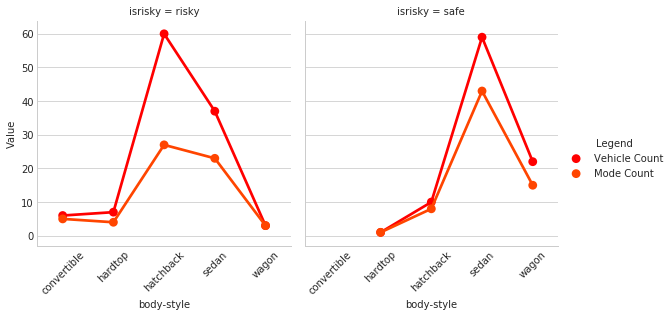

In [129]:
facet1c=sns.factorplot(x="body-style",y="Value", hue="Legend", col="isrisky", data =bsriskcounts, palette=palette)
facet1c.facet_axis(0,0).set_xticklabels(facet1c.facet_axis(0,0).get_xticklabels(), rotation=45)
facet1c.facet_axis(0,1).set_xticklabels(facet1c.facet_axis(0,1).get_xticklabels(), rotation=45)

So this clearly shows that convertibles and hardtops are riskier compared to sedans and wagons. Hatchbacks on the other hand does not show a clear trend with respect to risk. 

## Factors contributing to risk symboling

### 1. Wheel base

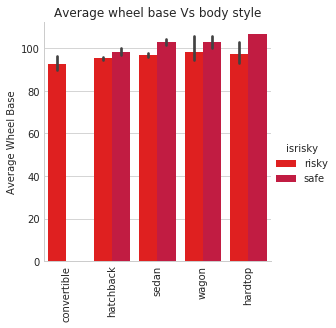

In [61]:
wbase = cars[['isrisky','body-style','wheel-base']].groupby(['isrisky','body-style'],as_index=False)['wheel-base'].mean()
wbase=wbase.sort_values('wheel-base')
wbase.reset_index(inplace=True,drop=True)
facet3=sns.factorplot(x="body-style",y="wheel-base", data=cars, hue="isrisky", kind="bar", palette=palette)
facet3.ax.set_title('Average wheel base Vs body style')
facet3.ax.set_xlabel('')
facet3.ax.set_ylabel('Average Wheel Base')
facet3.ax.set_xticklabels(facet3.ax.get_xticklabels(), rotation=90)
facet3.ax.patch.set_alpha(0)
facet3.fig.patch.set_alpha(0.5)
facet3.fig.savefig('./graphs/wbase_bodystyle.png',dpi=facet3.fig.dpi,bbox_inches='tight')
# Print values on top of bars
#for p in facet3.ax.patches:
#    ypos=p.get_height()
#    xpos=(p.get_x() + p.get_width()/2.0) #center of the bar
#    facet3.ax.text(xpos,ypos, '{:1.2f}'.format(ypos) , ha="center")
plt.show()

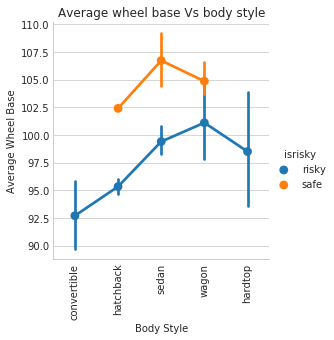

In [66]:
facet4=sns.factorplot(x="body-style",y="wheel-base", data=cars, hue="isrisky")
facet4.ax.set_title('Average wheel base Vs body style')
facet4.ax.set_xlabel('Body Style')
facet4.ax.set_ylabel('Average Wheel Base')
facet4.ax.set_xticklabels(facet4.ax.get_xticklabels(), rotation=90)
# Print values on top of bars
#for p in facet3.ax.patches:
#    ypos=p.get_height()
#    xpos=(p.get_x() + p.get_width()/2.0) #center of the bar
#    facet3.ax.text(xpos,ypos, '{:1.2f}'.format(ypos) , ha="center")
plt.show()

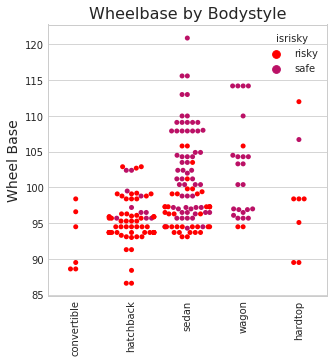

In [70]:
palette=["#FF0000","#bb1166"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Wheelbase by Bodystyle", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax=sns.swarmplot(x="body-style",y="wheel-base",hue="isrisky",data=cars,palette=palette)
gax.set_ylabel('Wheel Base',fontsize=14 )
gax.set_xlabel('',fontsize=14)
gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/wbase_bodystyle_swarm.png',dpi=fig.dpi,bbox_inches='tight')

Within each body style, risky vehicles have lesser wheel bases compared to riskier ones. Conertibles and hardtops hae significantly less wheel base compared to other body styles.

### 2. Height

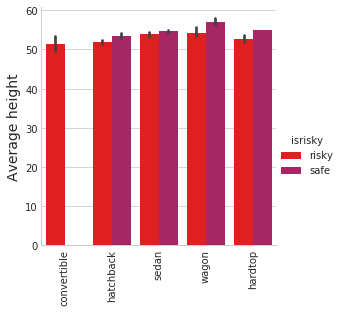

In [72]:
facet5=sns.factorplot(x="body-style",y="height", data=cars,kind="bar",hue="isrisky", palette=palette)
facet5.set_titles('Average height Vs body style')
facet5.set_xlabels('', fontsize=14)
facet5.set_ylabels('Average height', fontsize=14)
facet5.ax.set_xticklabels(facet5.ax.get_xticklabels(), rotation=90)

facet5.ax.patch.set_alpha(0)
facet5.fig.patch.set_alpha(0.5)

facet5.fig.savefig('./graphs/height_bodystyle.png',dpi=facet5.fig.dpi,bbox_inches='tight')
# Print values on top of bars

#facet6=sns.factorplot(x="body-style",y="height", data=cars,kind="point",hue="isrisky")
#facet6.set_titles('Average height Vs body style')
#facet6.set_xlabels('Body Style')
#facet6.set_ylabels('Average height')
#facet6.ax.set_xticklabels(facet6.ax.get_xticklabels(), rotation=90)
plt.show()

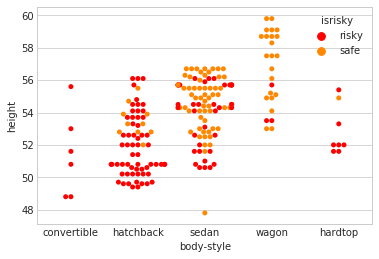

In [178]:

sns.swarmplot(x="body-style",y="height",hue="isrisky",data=cars,palette=palette)

<Figure size 432x288 with 0 Axes>

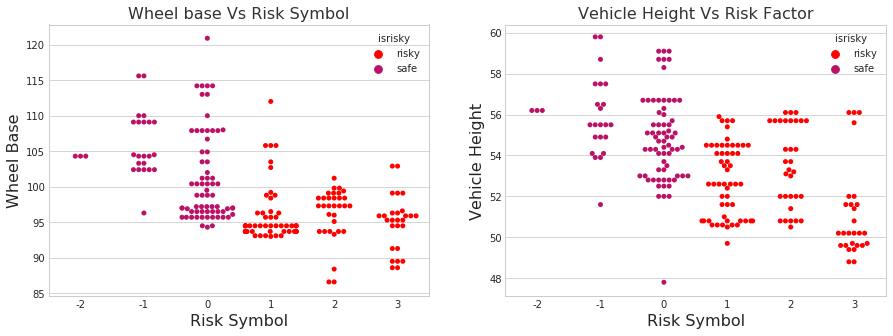

In [71]:
palette=["#FF0000","#bb1166"]
#Correlation between - wheel-base | height | num_doors | symboling 
sns.set_style("whitegrid") #set seaborn style template

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  0.1, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.2, 
    hspace  =  0.8
)

fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1) # get the figure and axes objects for a 3x2 subplot figure
fig.patch.set_alpha(0.5)

ax[0].set_title("Wheel base Vs Risk Symbol", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

ax[0].set_xlim(-3,3)
#fe_enginesize_reg=sns.regplot(x="symboling", y="wheel-base",data = cars, ax=ax[0], scatter_kws={"color":"#dd0033"}, line_kws={"color":"#ff0800"},marker='o', order=1)
fe_enginesize_reg=sns.swarmplot(x="symboling", y="wheel-base",data = cars, ax=ax[0], hue="isrisky",palette=palette)
fe_enginesize_reg.set_ylabel('Wheel Base', fontsize=16)
fe_enginesize_reg.set_xlabel('Risk Symbol', fontsize=16)


ax[1].set_title("Vehicle Height Vs Risk Factor", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)

fe_price_reg=sns.swarmplot(x="symboling", y="height",data = cars, ax=ax[1], hue="isrisky", palette=palette)
fe_price_reg.set_ylabel('Vehicle Height', fontsize=16)
fe_price_reg.set_xlabel('Risk Symbol', fontsize=16)

#plt.show()
fig.savefig('./graphs/wbase_symbol_height.png',dpi=fig.dpi,bbox_inches='tight')

Safer ehicles within each bodystyle are taller than riskier cars. They have longer wheel bases.

As the height of the ehicle reduces, ingress and egress becomes increasingly difficult for passengers. At the same time, a reduction in ehicle height reduces the center of graity of the car and hence improed stability especially while doing high speed cornerings. So, when a manufacturer reduces the height of a car, they are clearly aiming the product for car enthusiasts and not for regular commuters.

### 3. Number of Doors
A two door car is meant to be a drier's car, while a four door one is meant for more passengers. They are meant for regular commute than performance driving. We can safely assume they carry around families more often compared to a two door car. 

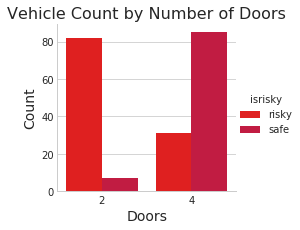

In [57]:
facet7a=sns.factorplot(x="numdoors", data=cars, hue="isrisky", kind="count", size=3, palette=palette )
facet7a.axes[0,0].set_title("Vehicle Count by Number of Doors", fontsize=16)
facet7a.axes[0,0].set_ylabel("Count", fontsize=14)
facet7a.axes[0,0].set_xlabel("Doors", fontsize=14)
facet7a.axes[0,0].patch.set_alpha(0)
facet7a.fig.patch.set_alpha(0.5)
facet7a.fig.savefig('./graphs/numdoors_count.png',dpi=facet7a.fig.dpi,bbox_inches='tight')

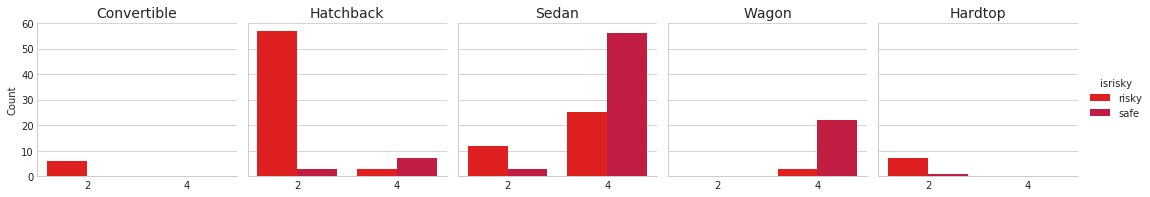

In [58]:
palette = ["#FF0000", "#dd0033"]
cars['numdoors'] = cars['num-of-doors'].map({"two":2,"four":4, "?":4})
cardoors = cars[['body-style','numdoors','isrisky']].groupby(['body-style','isrisky'])
cardoorsmd = cardoors['numdoors'].apply(lambda nd: stats.mode(nd)[0][0]).reset_index()

facet7=sns.factorplot(x="numdoors", data=cars, hue="isrisky", kind="count", col="body-style", col_wrap=5, size=3, palette=palette )
facet7.set_titles('Number of Doors Vs Body style')
#facet7.set_xlabels('Number of Doors')
facet7.set_ylabels('Count')
#facet7.ax.set_xticklabels(facet7.ax.get_xticklabels(), rotation=90)
facet7.axes[0].set_title("Convertible", fontsize=14)
facet7.axes[1].set_title("Hatchback", fontsize=14)
facet7.axes[2].set_title("Sedan", fontsize=14)
facet7.axes[3].set_title("Wagon", fontsize=14)
facet7.axes[4].set_title("Hardtop", fontsize=14)

for ax in facet7.axes:
    ax.patch.set_alpha(0)
    ax.set_xlabel("")
facet7.fig.patch.set_alpha(0.5)    
facet7.fig.savefig('./graphs/numdoors_bodystyle.png',dpi=facet7.fig.dpi,bbox_inches='tight')
#plt.show()

Number of doors does not determine the risk factor of a car directly. Haing 4 doors does not ensure a place in the safe category, but then, we can see that safer cars are always found among 4 door category. 

### 4. Engine Size
Engine size is the total displacement of all cylinders added together(total olume of swept area of one cylinder multiplied by number of cylinders). For smaller engines it is normally measure in CC (cubic centimeters) while for larger ones, it is mentioned in liters. E.g 1.5 L. For older cars in the US, it used to be mentioned in cubic inches. In this data, we have the engine sizes mentioned in cubic inches. 

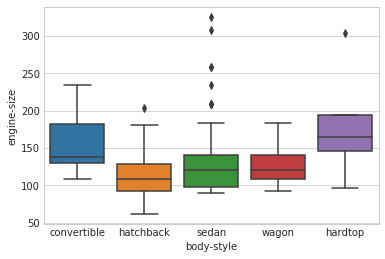

In [213]:
sns.boxplot(x="body-style",y="engine-size",data=cars)

### Keep outlier engines aside for engine size related comparisons.

In [5]:
import collections as cl

def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = cl.Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v >= n )
    
    return multiple_outliers  

outlier_records = detect_outliers(cars,1,["engine-size"])
#cars.iloc[[15, 16, 17, 47, 48, 49, 71, 72, 73, 74],:][['make','body-style','engine-size']]
carseng=cars.drop(outlier_records, axis=0).reset_index(drop=True)

[Text(0,0,'sporty'), Text(1,0,'other')]

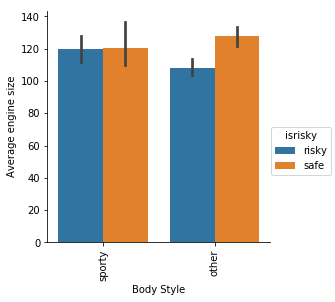

In [6]:
def marksporty(x):
    if(x == 'convertible' or x == 'hardtop' or x == 'hatchback'):
        return "sporty"
    return "other"

carseng['sporty'] = carseng['body-style'].apply(lambda x: marksporty(x))

facet9=sns.factorplot(x="sporty",y="engine-size", data=carseng,kind="bar",hue="isrisky")
facet9.set_titles('Average engine size Vs body style')
facet9.set_xlabels('Body Style')
facet9.set_ylabels('Average engine size')
facet9.ax.set_xticklabels(facet9.ax.get_xticklabels(), rotation=90)


### 5. Horsepower

In [8]:
def impute_groupmean(df,grpby,feature):
    #grpby='body-style'
    #feature = 'horsepower'
    #print(type(df))
    df=df.merge(df.groupby(by=grpby, as_index=False)[feature].mean(), left_on=grpby, right_on=grpby, how="inner", suffixes=['', '_right'])
    df[feature] = np.where(df[feature].isnull(),df[feature+'_right'],df[feature])
    df.drop(feature+'_right', axis=1, inplace=True)
    return df


In [9]:
#ConVert non-numeric horsepower alues to NaNs
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars['hp'] = cars['horsepower']
#cars[pd.isna(cars['horsepower'])]
cars=impute_groupmean(cars,'body-style','horsepower')
cars[pd.isna(cars['hp'])]

#cars.iloc[[130,131]]
#outlier_indices = detect_outliers(cars,1,['horsepower'])
#outlier_indices

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,isrisky,isrisky10,numdoors,hp
54,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,8.7,101.333333,?,23,31,9895,risky,1,2,NaN
184,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,8.7,97.750000,?,23,31,9295,safe,0,4,NaN


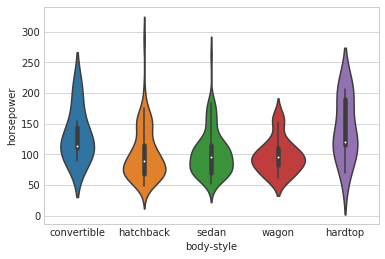

In [388]:
sns.violinplot(x="body-style",y="horsepower",data=cars)

In [309]:
outlier_indices = detect_outliers(cars,1,['horsepower'])
cars.iloc[outlier_indices]
carshp=cars.drop(outlier_indices, axis=0).reset_index(drop=True)


[Text(0,0,'sporty'), Text(1,0,'other')]

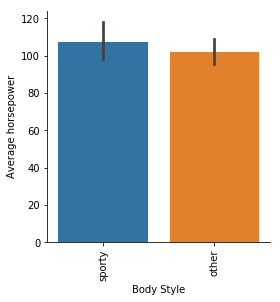

In [11]:
#carshp['sporty'] = carshp['body-style'].apply(lambda x: marksporty(x))
cars['sporty'] = cars['body-style'].apply(lambda x: marksporty(x))
facet10=sns.factorplot(x="sporty",y="horsepower", data=cars,kind="bar")
facet10.set_titles('Average horsepower Vs body style')
facet10.set_xlabels('Body Style')
facet10.set_ylabels('Average horsepower')
facet10.ax.set_xticklabels(facet10.ax.get_xticklabels(), rotation=90)

### Stroke to Bore ratio

[Text(0,0,'sporty'), Text(1,0,'other')]

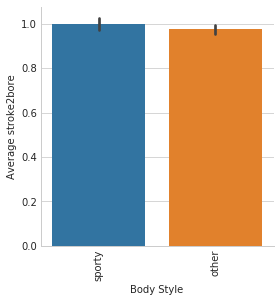

In [350]:
cars['stroke'] = pd.to_numeric(cars['stroke'], errors='coerce')
cars['bore'] = pd.to_numeric(cars['bore'], errors='coerce')
cars['stroke2bore'] = cars['stroke']/cars['bore']

facet11=sns.factorplot(x="sporty",y="stroke2bore", data=cars,kind="bar")
facet11.set_titles('Average stroke2bore Vs body style')
facet11.set_xlabels('Body Style')
facet11.set_ylabels('Average stroke2bore')
facet11.ax.set_xticklabels(facet11.ax.get_xticklabels(), rotation=90)

A larger bore size is indicative of a higher revving engine - a mark of a sporty car. Stroke to bore ratio will be lesser when bore sizes are higher. 

### Power to Weight ratio
Power in watts diided by weight in Kg.

[Text(0,0,'sporty'), Text(1,0,'other')]

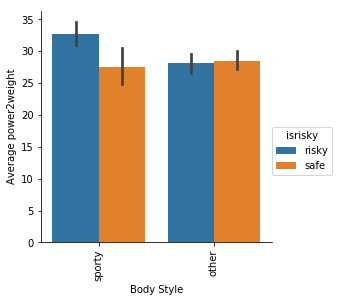

In [13]:
#cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
#cars['curb-weight'] = pd.to_numeric(cars['curb-weight'], errors='coerce')
cars['power2weight'] = (cars['horsepower']/0.001341) / cars['curb-weight']
#carshp['power2weight'] = (carshp['horsepower']/0.001341) / carshp['curb-weight']

#print(cars['power2weight'].head())

#facet12=sns.factorplot(x="sporty",y="power2weight", data=carshp,kind="bar",hue="isrisky")
facet12=sns.factorplot(x="sporty",y="power2weight", data=cars,kind="bar",hue="isrisky")
facet12.set_titles('Average power2weight Vs body style')
facet12.set_xlabels('Body Style')
facet12.set_ylabels('Average power2weight')
facet12.ax.set_xticklabels(facet12.ax.get_xticklabels(), rotation=90)

Notice how the power to weight ratio of sporty cars - especially the risky ones remain way aboe the safer ones. The relatiely commuter type cars hae more or less same power to weight ratio across safe and risky categories.


### DriVe wheels

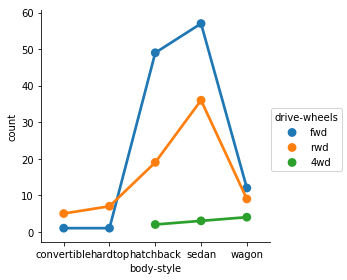

In [47]:
cars['drwheel'] = cars['drive-wheels'].map({"rwd": 1, "fwd": 2, "4wd": 3})

carsdrv=cars.groupby(by=['body-style','drive-wheels'],as_index=False)['drive-wheels'].size().reset_index(name="count")
carsdrv

sns.factorplot(x='body-style',y='count', data=carsdrv, hue="drive-wheels")

Majority of Conertibles and hardtops are rear-wheel driVes. A rear wheel drie is known to better support tight cornerings at higher speeds - a feature typically compared in performance cars. 

In [133]:
cars.groupby(["drive-wheels","body-style"])['body-style'].count()

drive-wheels  body-style 
4wd           hatchback       2
              sedan           3
              wagon           4
fwd           convertible     1
              hardtop         1
              hatchback      49
              sedan          57
              wagon          12
rwd           convertible     5
              hardtop         7
              hatchback      19
              sedan          36
              wagon           9
Name: body-style, dtype: int64

### Price

In [343]:
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')
cars['price-bkp'] = cars['price']
#cars[pd.isna(cars['horsepower'])]
cars=impute_groupmean(cars,'body-style','price')
cars[pd.isna(cars['price-bkp'])]


#sns.swarmplot(x="sporty",y="price",data=cars, hue="isrisky")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,isrisky,hp,sporty,power2weight,drwheel,price-bkp
7,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,5500,16,22,9957.441176,safe,160.0,sporty,39.080886,3,NaN
53,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,5750,17,28,9957.441176,risky,288.0,sporty,63.804249,1,NaN
99,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,5400,38,43,14459.755319,risky,70.0,other,27.854776,2,NaN
100,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,5400,38,43,14459.755319,safe,70.0,other,27.344081,2,NaN


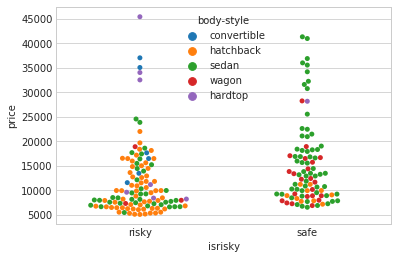

In [346]:
sns.swarmplot(x="isrisky",y="price",data=cars, hue="body-style")

In [ ]:
Price do not seem to have any contribution to symboling alues

### Number of cylinders

In [14]:
def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

cars['num_cylinders'] = cars['num-of-cylinders'].apply(lambda x: calc_num_cylinders(x))

def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0
       
cars['num_doors'] = cars['num-of-doors'].apply(lambda x: calc_num_doors (x))

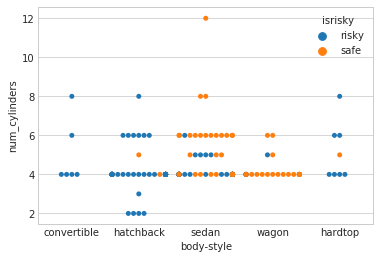

In [348]:
sns.swarmplot(x="body-style",y="num_cylinders",data=cars, hue="isrisky")

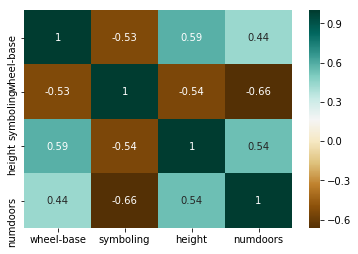

In [15]:
sns.heatmap(cars[['wheel-base','symboling','height', 'numdoors']].corr(),cmap="BrBG",annot=True)

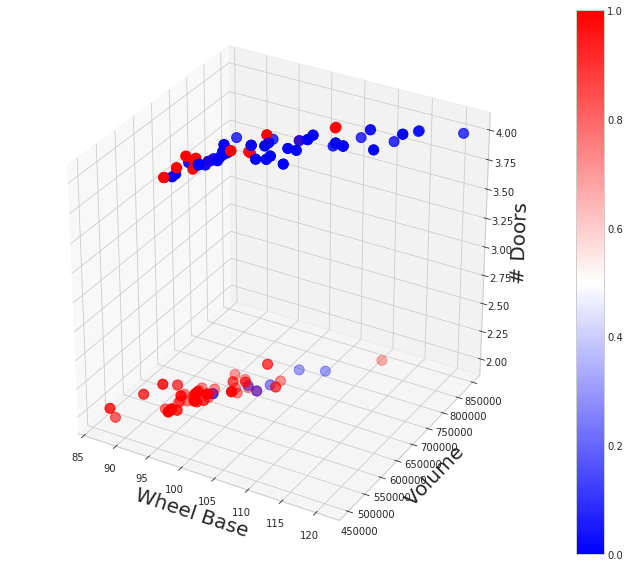

In [91]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')


x = cars['wheel-base']
y = cars['height']
y = cars['volume']
z = cars['numdoors']
color = cars['isrisky10']


cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('bwr'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Wheel Base',fontsize=20)
ax.set_ylabel('Volume',fontsize=20)
ax.set_zlabel('# Doors',fontsize=20)
ax.patch.set_alpha(0)
fig.patch.set_alpha(0.5)

fig.savefig('./graphs/wheelbase_volume_doors.png',dpi=fig.dpi,bbox_inches='tight')

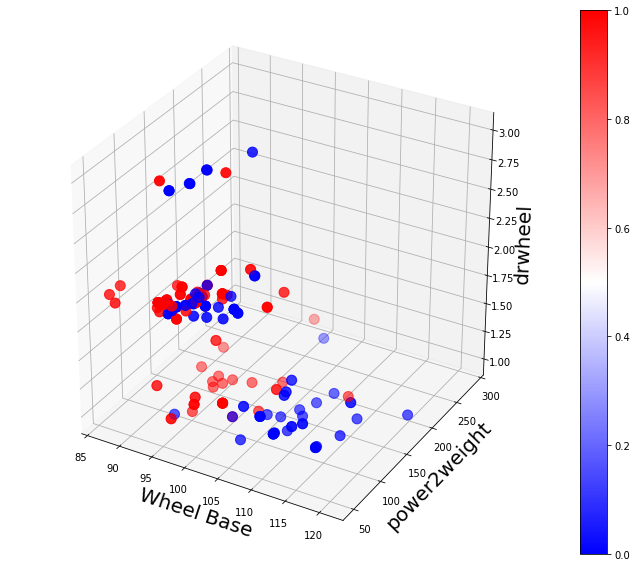

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')


x = cars['wheel-base']
y = cars['horsepower']
z = cars['drwheel']    #{"rwd": 1, "fwd": 2, "4wd": 3}
color = cars['isrisky10']


cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('bwr'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Wheel Base',fontsize=20)
ax.set_ylabel('power2weight',fontsize=20)
ax.set_zlabel('drwheel',fontsize=20)


plt.show()

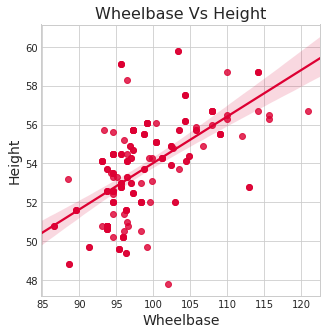

In [83]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) 
ax.set_title("Wheelbase Vs Height", fontsize=16)
fig.patch.set_alpha(0.5)
ax.patch.set_alpha(0)

gax=sns.regplot(x='wheel-base', y='height', data=cars, color=plot_color)
gax.set_ylabel('Height', fontsize=14)
gax.set_xlabel('Wheelbase',fontsize=14)
fig.savefig('./graphs/enginesize_02_horsepower.png',dpi=fig.dpi,bbox_inches='tight')

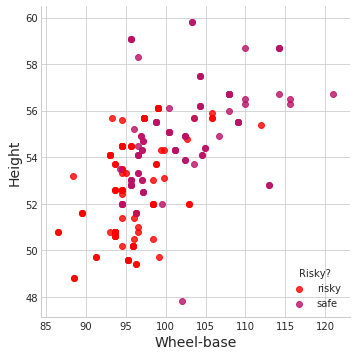

In [76]:

gax=sns.lmplot('wheel-base', 'height', data=cars, fit_reg=False, hue="isrisky", palette=palette,legend=False)

gax.facet_axis(0,0).patch.set_alpha(0)
gax.fig.patch.set_alpha(0.5)

gax.set_ylabels('Height',fontsize=14 )
gax.set_xlabels('Wheel-base',fontsize=14)
gax.facet_axis(0,0).legend(loc="lower right",framealpha=0, title="Risky?")
gax.fig.savefig('./graphs/wheelbase_height_scatter.png',dpi=gax.fig.dpi,bbox_inches='tight')

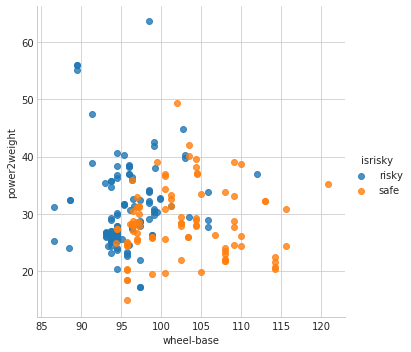

In [377]:
sns.lmplot('wheel-base', 'power2weight', data=cars, fit_reg=False, hue="isrisky")

In [40]:
allvars=cars.groupby(by='symboling',as_index=False)['wheel-base','height','power2weight','horsepower','volume'].mean()
allvars = allvars.melt('symboling',var_name='cols',  value_name='vals')
#allvars

ndoormode = cars.groupby('symboling')['numdoors'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
ndoormode.columns=['symboling','vals']
ndoormode['cols'] = 'numdoors'

#symboling	cols	vals

allvars=allvars.append(ndoormode[['symboling','cols','vals']], ignore_index=False, verify_integrity=False)
allvars.reset_index(drop=True, inplace=True)
allvars['vals'] = np.log(allvars['vals'])

allvars



,symboling,cols,vals
0,-2,wheel-base,4.647271
1,-1,wheel-base,4.664082
2,0,wheel-base,4.616302
3,1,wheel-base,4.563441
4,2,wheel-base,4.566819
5,3,wheel-base,4.553799
6,-2,height,4.028917
7,-1,height,4.023646
8,0,height,4.003309
9,1,height,3.966757


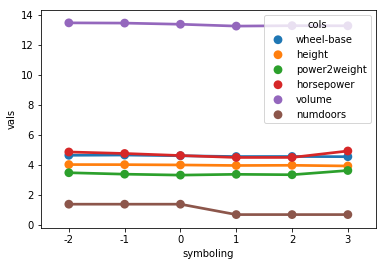

In [41]:
sns.pointplot(x='symboling', y='vals', hue='cols',data=allvars)

In [391]:
cars[['num_cylinders','wheel-base','length','height','width','engine-size','num_doors','stroke','bore','compression-ratio','horsepower','peak-rpm','curb-weight','city-mpg']].corr()

,num_cylinders,wheel-base,length,height,width,engine-size,num_doors,stroke,bore,compression-ratio,horsepower,curb-weight,city-mpg
num_cylinders,1.000000,0.339507,0.430672,-0.013995,0.545007,0.846031,-0.005378,0.008578,0.243553,-0.020002,0.691565,0.609727,-0.445837
wheel-base,0.339507,1.000000,0.874587,0.589435,0.795144,0.569329,0.437162,0.161477,0.490378,0.249786,0.352445,0.776386,-0.470414
length,0.430672,0.874587,1.000000,0.491029,0.841118,0.683360,0.389620,0.129739,0.607480,0.158414,0.553822,0.877728,-0.670909
height,-0.013995,0.589435,0.491029,1.000000,0.279210,0.067149,0.528343,-0.056999,0.176195,0.261214,-0.110137,0.295572,-0.048640
width,0.545007,0.795144,0.841118,0.279210,1.000000,0.735433,0.202903,0.182956,0.559204,0.181129,0.641805,0.867032,-0.642704
engine-size,0.846031,0.569329,0.683360,0.067149,0.735433,1.000000,0.028701,0.206675,0.594090,0.028971,0.810505,0.850594,-0.653658
num_doors,-0.005378,0.437162,0.389620,0.528343,0.202903,0.028701,1.000000,-0.023098,0.122102,0.116988,-0.102841,0.200148,-0.041322
stroke,0.008578,0.161477,0.129739,-0.056999,0.182956,0.206675,-0.023098,1.000000,-0.055909,0.186170,0.085985,0.168929,-0.042906
bore,0.243553,0.490378,0.607480,0.176195,0.559204,0.594090,0.122102,-0.055909,1.000000,0.005203,0.576017,0.649045,-0.594584
compression-ratio,-0.020002,0.249786,0.158414,0.261214,0.181129,0.028971,0.116988,0.186170,0.005203,1.000000,-0.205299,0.151362,0.324701


### Interior Volume

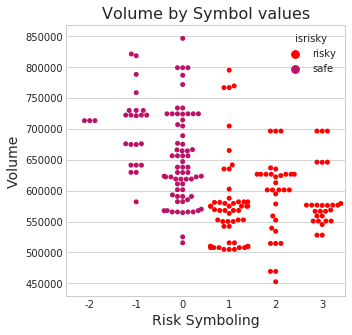

In [86]:
palette=["#FF0000","#bb1166"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Volume by Symbol values", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax=sns.swarmplot(x="symboling", y="volume", data=cars, hue="isrisky",palette=palette, ax=ax)
gax.set_ylabel('Volume',fontsize=14 )
gax.set_xlabel('Risk Symboling',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/Volume_symboling_swarm.png',dpi=fig.dpi,bbox_inches='tight')